In [17]:
import torch
import numpy as np

# requires_grad和grad_fn

In [4]:
x = torch.ones(2, 2, requires_grad=True)  #初始化参数x并设置requires_grad=True用来追踪其计算历史

In [ ]:
x.dtype

In [5]:
print(x)

torch.float32

In [3]:
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [4]:
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [5]:
z = y*y*3  #平方x3
print(z)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)


In [6]:
out = z.mean() #求均值
print(out)

tensor(27., grad_fn=<MeanBackward0>)


In [7]:
# 梯度计算 反向传播
out.backward()

In [8]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [9]:
a = torch.randn(2, 2)
a

tensor([[-1.0364, -1.8455],
        [ 0.7983, -0.2636]])

In [10]:
a = ((a * 3) / (a - 1))
print(a.requires_grad)  #False
a.requires_grad_(True)  #就地修改
print(a.requires_grad)  #True
b = (a * a).sum()
print(b.grad_fn) # <SumBackward0 object at 0x4e2b14345d21>

False
True


In [11]:
with torch.no_grad():
    c = (a * a).sum()  #tensor(151.6830),此时c没有gard_fn
    
print(c.requires_grad) #False

False


# 手动线性回归

In [29]:
x = torch.randn([10, 1])
x

tensor([[ 0.0534],
        [ 0.9114],
        [-1.6951],
        [ 0.0283],
        [-0.4457],
        [ 0.0727],
        [-0.8096],
        [-0.0486],
        [-0.1592],
        [ 1.1497]])

In [31]:
x = torch.randn([10,]) # == x = torch.randn([10,])
x

tensor([ 0.7395,  0.3794,  0.8448, -1.0681,  1.3178,  0.4969, -2.4945, -0.0567,
         0.9734,  0.4817])

In [19]:
a = np.array([[1,2,3],[4,5,6]])
a = np.array([1,2,3])
a.shape

(3,)

In [28]:
a = np.random.randn(10,1)
a


array([[ 0.81209524],
       [ 0.56013758],
       [-1.07821547],
       [-1.32075528],
       [-1.46477874],
       [-0.47668192],
       [-0.86478197],
       [ 0.64263552],
       [ 0.86732281],
       [ 2.72213311]])

In [27]:
a = np.random.randn(10,)
a

array([ 1.53505828,  0.50060331,  0.56227636,  0.83129714,  0.68328584,
        1.03592224,  0.20933532, -0.43689177, -1.38536723, -0.59963342])

In [12]:
import torch
import matplotlib.pyplot as plt

learning_rate = 0.1

# 1. 准备数据 #y = 3x + 0.8
x = torch.randn([500, 1])
y_true = 3 * x + 0.8

# 2. 计算预测值 y_pred = x * w + b
w = torch.rand([], requires_grad=True)
b = torch.tensor(0, dtype=torch.float, requires_grad=True)

for k in range(60):
    for i in [w, b]:
        if i.grad is not None:
            i.grad.data.zero_()

    y_predict = x * w + b
    # 3. 计算损失，把参数的梯度置为0，进行反向传播
    loss = (y_predict - y_true).pow(2).mean()

    loss.backward()
    # 3.1 能够得到w和b的梯度
    # 4. 更新参数
    w.data = w.data - learning_rate * w.grad
    b.data = b.data - learning_rate * b.grad
    if k % 10 == 0:
        print(k, loss.item(), w.item(), b.item())
print(w,b)

0 9.138619422912598 0.6340732574462891 0.1858101338148117
10 0.11478043347597122 2.7261736392974854 0.7628849744796753
20 0.0015252337325364351 2.967888593673706 0.7993722558021545
30 2.1339134036679752e-05 2.9961884021759033 0.8003285527229309
40 3.1144625722845376e-07 2.999542713165283 0.8000825047492981
50 4.668839093113775e-09 2.9999446868896484 0.8000145554542542
tensor(3.0000, requires_grad=True) tensor(0.8000, requires_grad=True)


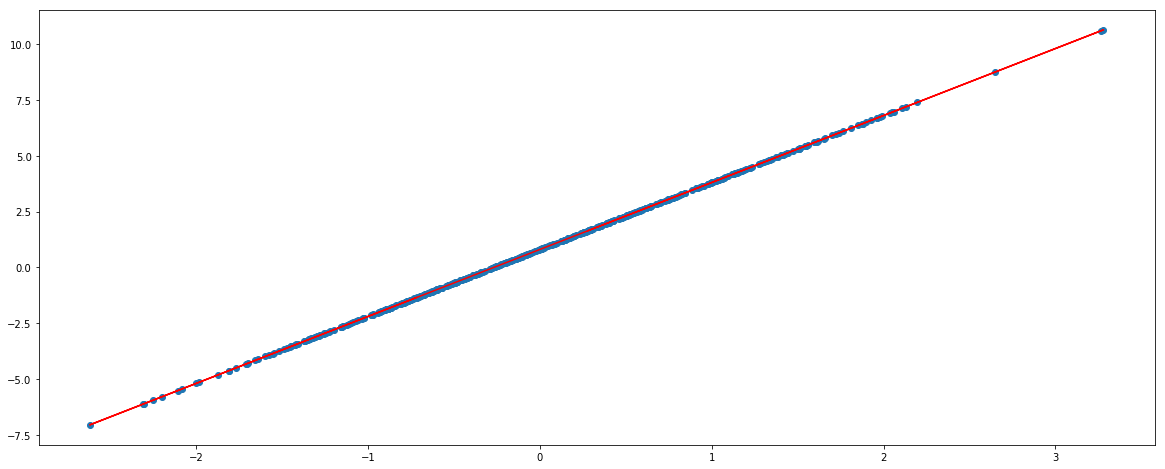

In [13]:
# 绘图
plt.figure(figsize=(20, 8))
plt.scatter(x.numpy(), y_true.numpy())

y_predict = x * w + b
plt.plot(x.numpy(), y_predict.detach().numpy(), c="red")
plt.show()